In [95]:
import numpy as np
import pandas as pd
import os 
import ants

In [2]:
df = pd.read_csv('../Data/general_csv.csv') #grab master list

In [50]:
df.head(5)

Unnamed: 0  collection_id  image03_id  dataset_id    subjectkey  \
0           1           2075      367948        9786  NDARAV510ZB5   
1           2           2075      367949        9786  NDARCZ285AMD   
2           3           2075      367950        9786  NDARVM585CF7   
3           4           2075      367951        9786  NDARXK457KEY   
4           5           2075      367952        9786  NDARJG780VAV   

  src_subject_id  interview_age sex comments_misc  \
0           1108            107   M           NaN   
1           1147            218   F           NaN   
2           1179            287   M           NaN   
3           1232            427   M           NaN   
4           1323            241   M           NaN   

                                          image_file  ...  \
0  s3://NDAR_Central_1/submission_10916/TNAD-x-21...  ...   
1  s3://NDAR_Central_1/submission_10916/TNAD-x-21...  ...   
2  s3://NDAR_Central_1/submission_10916/TNAD-x-21...  ...   
3  s3://NDAR_Central_1/submission_10916/TNAD-x-21...  ...   
4  s3://NDAR_Central_1/submission_10916/TNAD-x-21...  ...   

  experiment_description visit  slice_timing bvek_bval_files  \
0                    NaN   NaN           NaN             NaN   
1                    NaN   NaN           NaN             NaN   
2                    NaN   NaN           NaN             NaN   
3                    NaN   NaN           NaN             NaN   
4                    NaN   NaN           NaN             NaN   

  deviceserialnumber procdate visnum manifest  \
0                NaN      NaN    NaN      NaN   
1                NaN      NaN    NaN      NaN   
2                NaN      NaN    NaN      NaN   
3                NaN      NaN    NaN      NaN   
4                NaN      NaN    NaN      NaN   

                                    collection_title  \
0  Mapping Thalamocortical Networks Across Develo...   
1  Mapping Thalamocortical Networks Across Develo...   
2  Mapping Thalamocortical Networks Across Develo...   
3  Mapping Thalamocortical Networks Across Develo...   
4  Mapping Thalamocortical Networks Across Develo...   

                                         local_paths  
0  ./image03/TNAD-x-212988-x-212988-x-501-d0203.n...  
1  ./image03/TNAD-x-214064-x-214064-x-501-d0203.n...  
2  ./image03/TNAD-x-212797-x-212797-x-501-d0203.n...  
3  ./image03/TNAD-x-215614-x-215614-x-501-d0203.n...  
4  ./image03/TNAD-x-212467-x-212467-x-501-d0203.n...  

[5 rows x 75 columns]

In [4]:
unique_studies = np.unique(df['collection_title'].values,return_counts=False)
nu = len(unique_studies)
counts = [len(np.unique(df['subjectkey'].values[df['collection_title'].values==unique_studies[i]])) for i in range(nu)]
collection_ids = [df[df['collection_title']==unique_studies[i]]['collection_id'].values[0] for i in range(nu)]
I = np.argsort(counts)[::-1]

In [5]:
for i in range(nu):
    print(f'N={counts[I[i]]} | ID={collection_ids[I[i]]} | {unique_studies[I[i]]}')

N=355 | ID=2955 | 1/3 Brain Function and Genetics in Pediatric Obsessive-Compulsive Behaviors
N=123 | ID=2400 | Atypical Late Neurodevelopment in Autism: A Longitudinal Clinical Phenotype and Multimodal Brain Imaging Study
N=109 | ID=2021 | Multimodal Developmental Neurogenetics of Females with ASD
N=97 | ID=2908 | The contribution of aberrant anticipatory processing to spectrum depression and mania, and cognitive and emotional dysfunction in major depressive and bipolar disorders
N=90 | ID=2342 | Cognitive and Neural Flexibility in Autism
N=69 | ID=2155 | Multimodal Treatment Study of Children With ADHD
N=66 | ID=2590 | Using complex video stimuli to elucidate atypical brain functioning in ASD
N=66 | ID=2075 | Mapping Thalamocortical Networks Across Development in ASD
N=56 | ID=2417 | The Neurobiology of Social Decision-Making
N=48 | ID=2923 | Social Processes Initiative in Neurobiology of Autism-spectrum and Schizophrenia-spectrum Disorders(SPIN-ASD)
N=40 | ID=2026 | Biomarkers of De

### Find subjects with anatomical + functional scans

In [52]:
# Select only data with nii.gz
local_paths = df['local_paths'].values
#sum([local_path.endswith('.nii.gz') for local_path in local_paths])

# Slice only lines with nifti files
has_nii = np.array([local_path.endswith('.nii.gz') or local_path.endswith('.nii') for local_path in local_paths])
df = df.loc[has_nii]

In [53]:
print(np.unique(df['scan_type'].values))
struct_names = ['MR structural (MPRAGE)','MR structural (T1)']
func_names = ['fMRI']

['MR structural (MPRAGE)' 'MR structural (T1)' 'MR structural (T2)' 'fMRI'
 'single-shell DTI']


In [54]:
has_struct = df['scan_type'].isin(struct_names).values
has_func = df['scan_type'].isin(func_names).values

In [55]:
subs_w_anat = np.unique(df['subjectkey'].iloc[has_struct].values)
subs_w_anat.shape

(85,)

In [56]:
subs_w_func = np.unique(df['subjectkey'].iloc[has_func].values)
subs_w_func.shape

(770,)

In [57]:
u,c = np.unique(np.hstack((subs_w_anat,subs_w_func)),return_counts=True)

In [58]:
subs_w_both = u[(c==2)]

In [59]:
df_both = df.iloc[df['subjectkey'].isin(subs_w_both).values]
df_both.head(2)

Unnamed: 0  collection_id  image03_id  dataset_id    subjectkey  \
13            14           2075      367961        9786  NDARXC788GNZ   
1771        1772           2072      440421       10609  NDARUJ264GM0   

     src_subject_id  interview_age sex                   comments_misc  \
13             1441            251   F                             NaN   
1771            642             93   M  scanned when subject was awake   

                                             image_file  ...  \
13    s3://NDAR_Central_1/submission_10916/TNAD-x-21...  ...   
1771  s3://NDAR_Central_2/submission_11529/image_dat...  ...   

     experiment_description visit  slice_timing bvek_bval_files  \
13                      NaN   NaN           NaN             NaN   
1771                    NaN   NaN           NaN             NaN   

     deviceserialnumber procdate visnum manifest  \
13                  NaN      NaN    NaN      NaN   
1771                NaN      NaN    NaN      NaN   

                                       collection_title  \
13    Mapping Thalamocortical Networks Across Develo...   
1771  Intrinsic Brain Architecture of Young Children...   

                                            local_paths  
13    ./image03/TNAD-x-214882-x-214882-x-501-d0203.n...  
1771  ./image03/image_data_2016/NDARUJ264GM0_mprage_...  

[2 rows x 75 columns]

In [60]:
unique_studies = np.unique(df_both['collection_title'].values,return_counts=False)
unique_studies

array(['Intrinsic Brain Architecture of Young Children with Autism While Awake and Asleep',
       'Mapping Thalamocortical Networks Across Development in ASD'],
      dtype=object)

In [61]:
len(np.unique(df_both.iloc[df_both['collection_title'].values==unique_studies[0]]['subjectkey'].values))

26

In [62]:
len(np.unique(df_both.iloc[df_both['collection_title'].values==unique_studies[1]]['subjectkey'].values))

50

In [ ]:
cd ~/ndar_fmri

Mapping Thalamocortical Networks Across Development in ASD


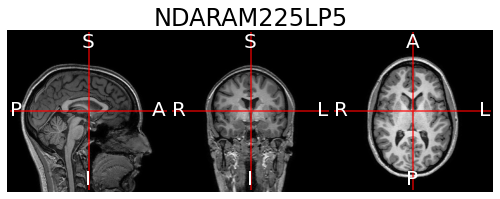

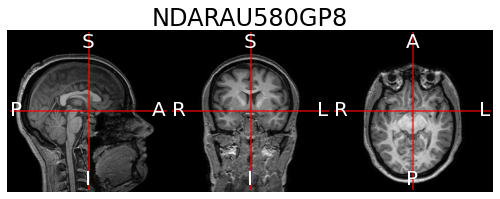

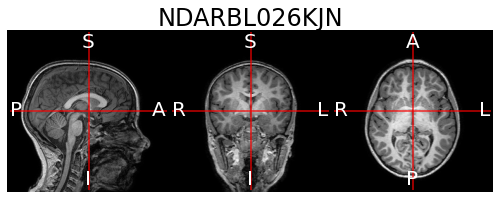

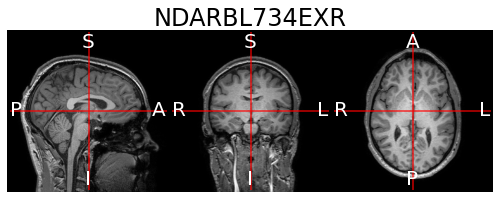

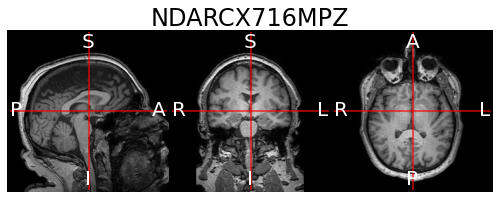

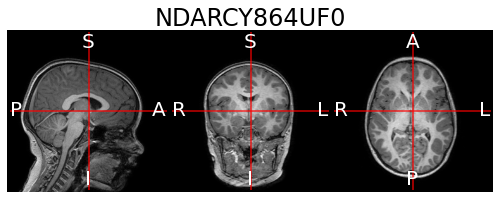

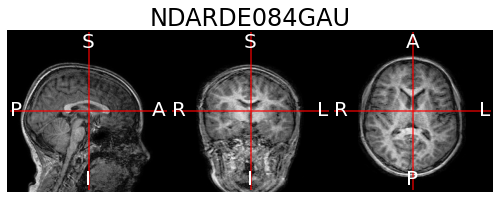

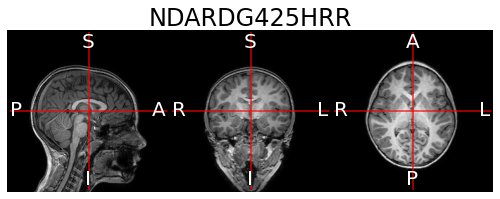

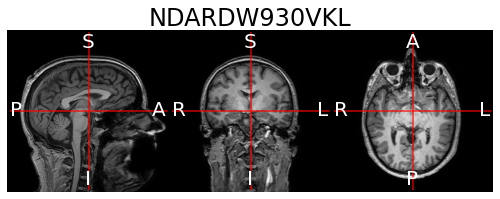

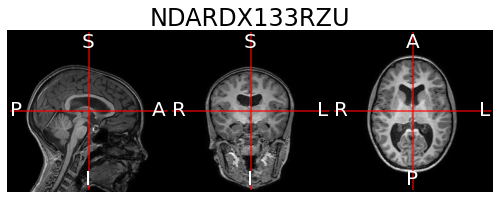

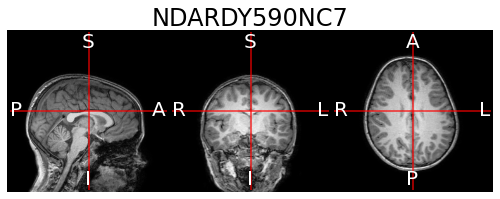

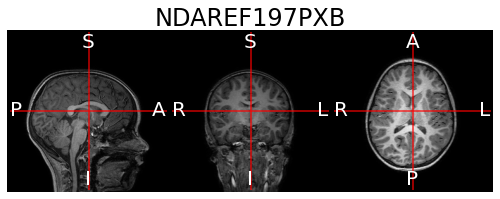

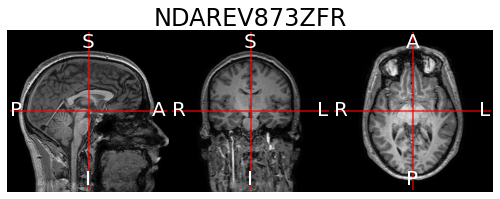

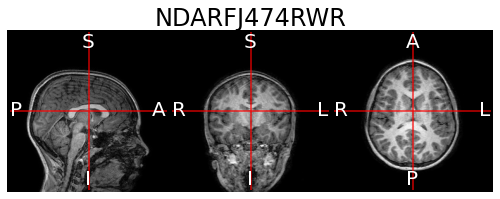

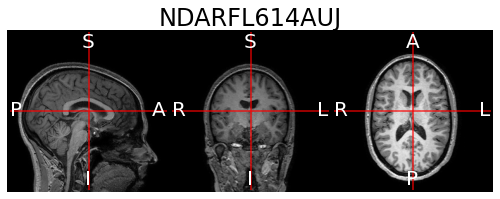

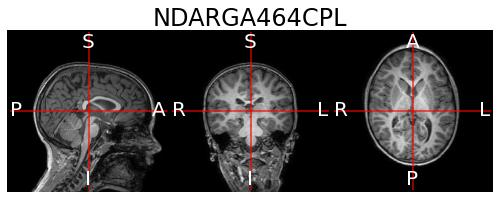

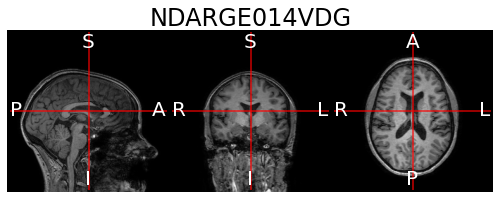

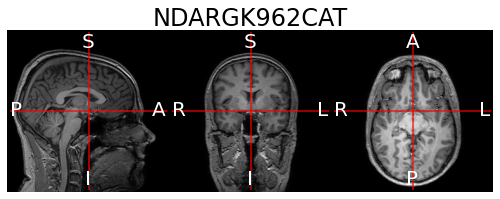

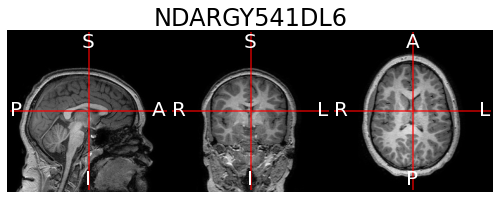

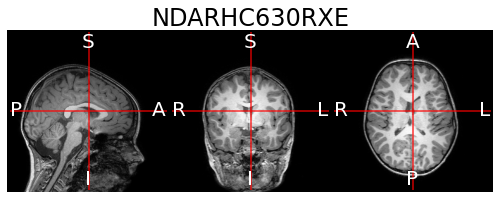

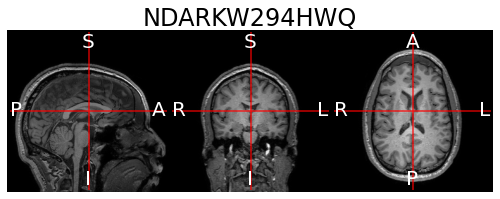

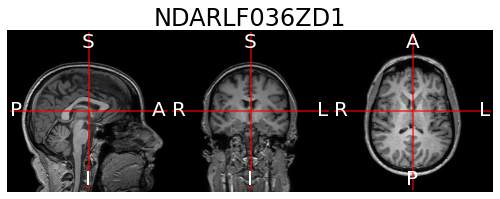

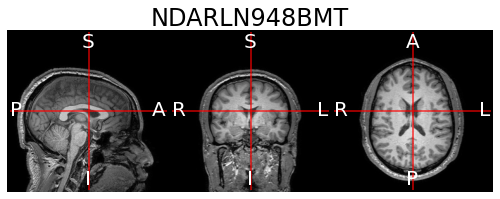

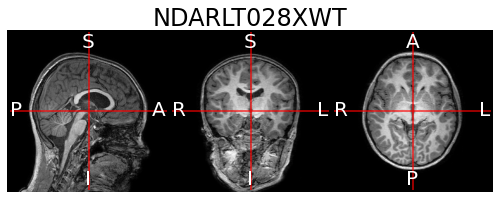

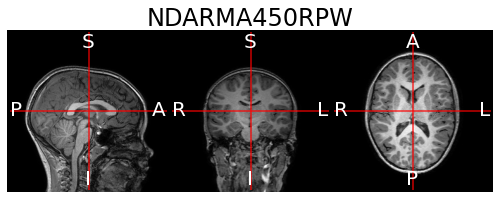

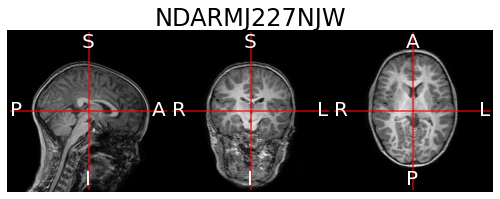

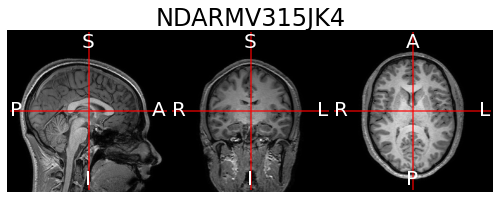

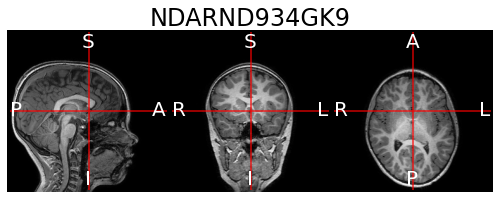

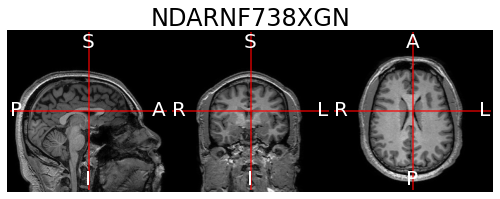

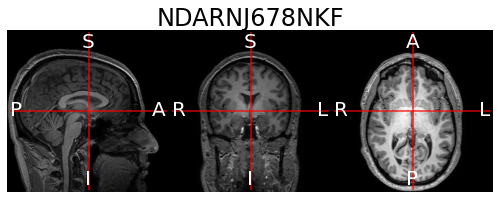

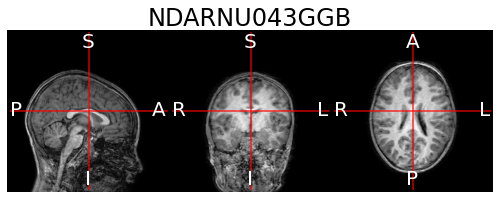

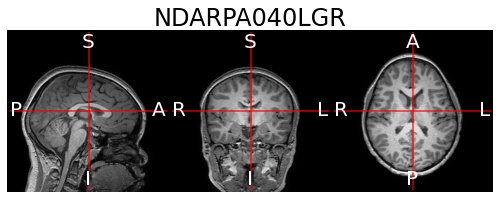

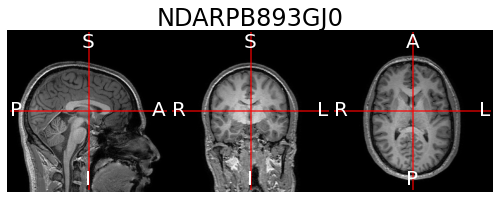

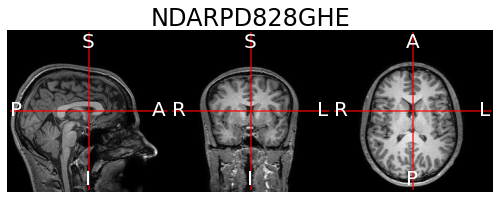

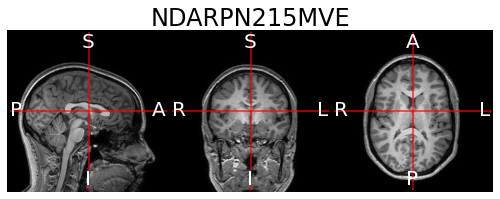

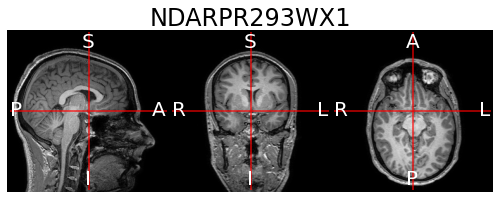

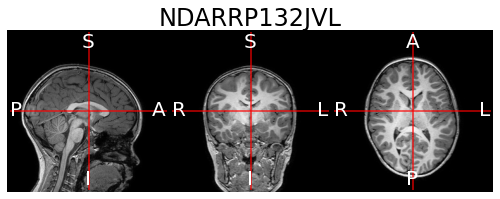

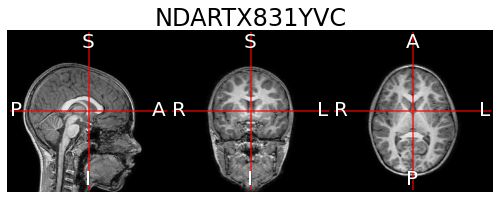

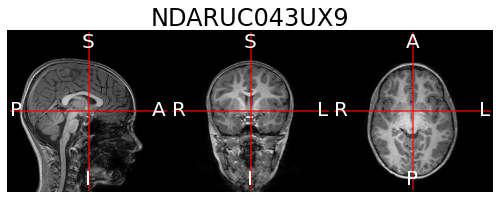

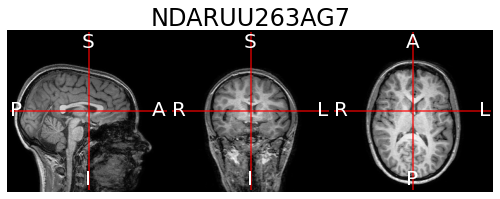

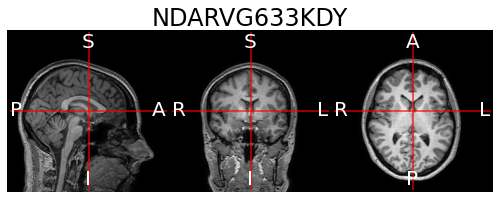

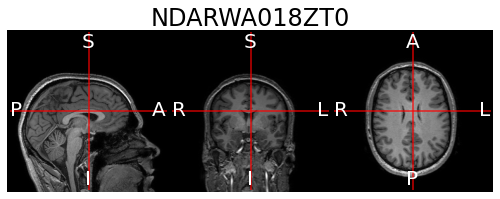

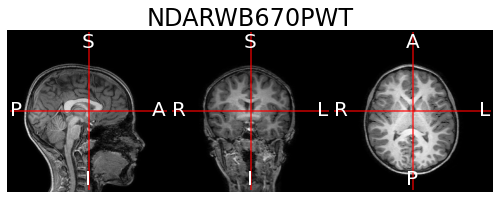

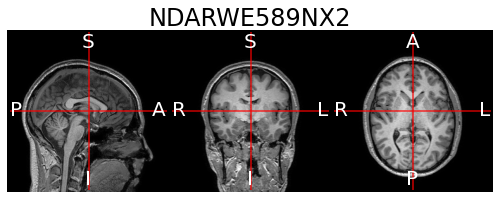

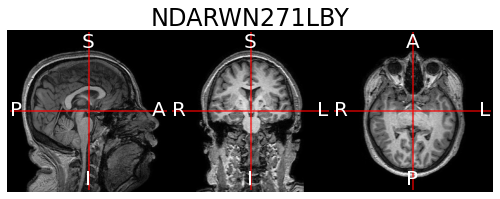

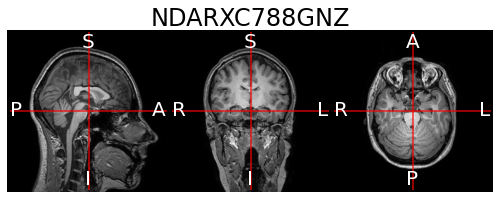

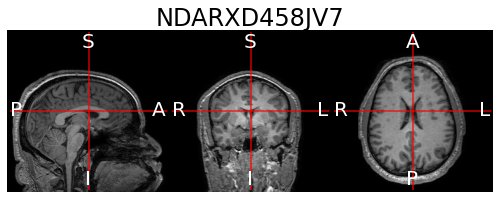

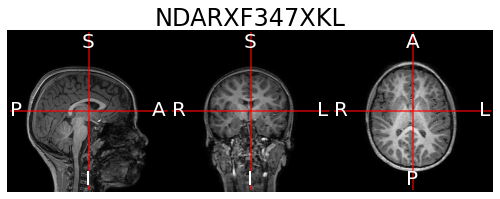

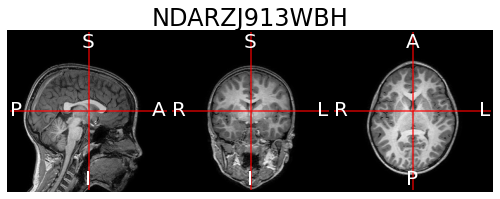

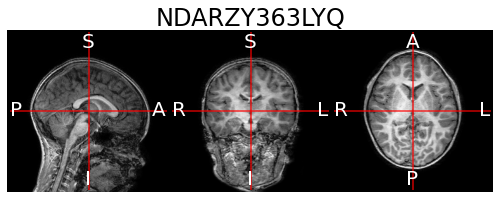

In [100]:
study = 1
print(unique_studies[1])
for i in range(50):
    sub = np.unique(df_both.iloc[df_both['collection_title'].values==unique_studies[study]]['subjectkey'].values)[i]
    path = df.iloc[(df['subjectkey'].values==sub)*df['scan_type'].isin(struct_names).values]['local_paths'].values[0]
    im = ants.image_read(path)
    im.plot_ortho(flat=True,title=sub)

In [20]:
!date

Wed Mar  2 15:06:52 EST 2022
